# Lab Journal 3

# Task 1 

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

Image dimensions: 275x183
Number of channels: 3


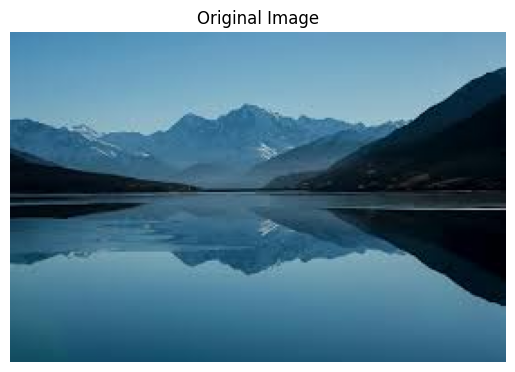

In [2]:
# a) Load any image, find its dimensions and number of channels and display it
img = cv2.imread('images.jpg')
height, width, channels = img.shape
print(f"Image dimensions: {width}x{height}")
print(f"Number of channels: {channels}")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

In [8]:
# b) Find the size, date, coding method, bit depth, height and width
file_size = os.path.getsize('images.jpg')
file_date = datetime.fromtimestamp(os.path.getmtime('images.jpg'))
coding_method = 'JPEG' if img.dtype == np.uint8 else 'Unknown'
bit_depth = img.dtype.itemsize * 8 # multiplying by 8 because we need to find the bits :D 

print(f"Size: {file_size} bytes")
print(f"Date: {file_date}")
print(f"Coding method: {coding_method}")
print(f"Bit depth: {bit_depth}")
print(f"Height: {height}")
print(f"Width: {width}")

Size: 4686 bytes
Date: 2024-09-19 13:09:55.448560
Coding method: JPEG
Bit depth: 8
Height: 183
Width: 275


In [9]:
# c) Convert a double having values outside the range [0 255] to uint8
double_img = np.random.rand(100, 100) * 300
uint8_img = double_img.astype(np.uint8)
print("\nConversion from double to uint8:")
print("Original max value:", double_img.max())
print("Converted max value:", uint8_img.max())



Conversion from double to uint8:
Original max value: 299.99309523382925
Converted max value: 255


# Task 2 

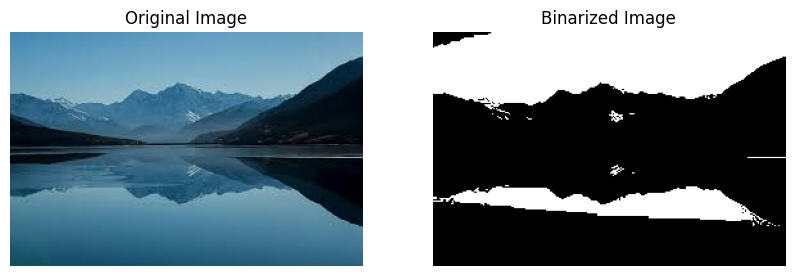

In [9]:
_, binary_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(binary_img, cmap='gray')
plt.title('Binarized Image')
plt.axis('off')

plt.show()

# Task 3

This is a three-channel image


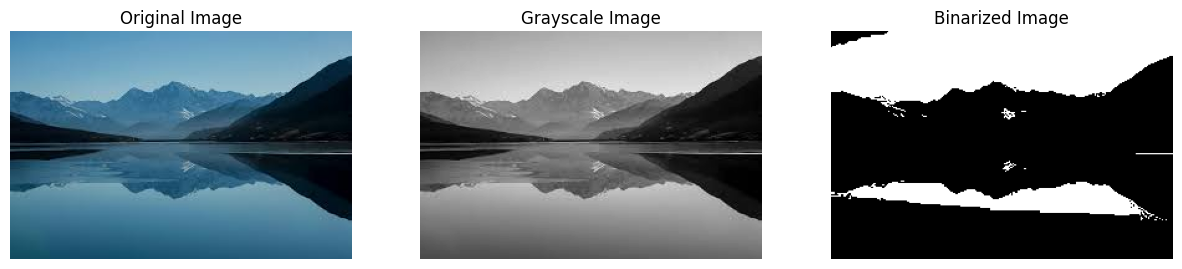

In [11]:
def process_image(image_path):
    img = cv2.imread(image_path)
    height, width, channels = img.shape
    
    if channels == 3: 
        print("This is a three-channel image")
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
        
        plt.figure(figsize=(15, 5))
        plt.subplot(131)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        plt.subplot(132)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Grayscale Image')
        plt.axis('off')
        
        plt.subplot(133)
        plt.imshow(binary_img, cmap='gray')
        plt.title('Binarized Image')
        plt.axis('off')
        
    elif channels == 1:
        print("This is a one-channel image")
        plt.imshow(img, cmap='gray')
        plt.title('One-channel Image')
        plt.axis('off')
    
    else:
        print(f"Unexpected number of channels: {channels}")
    
    plt.show()

process_image('images.jpg')

# Task 4

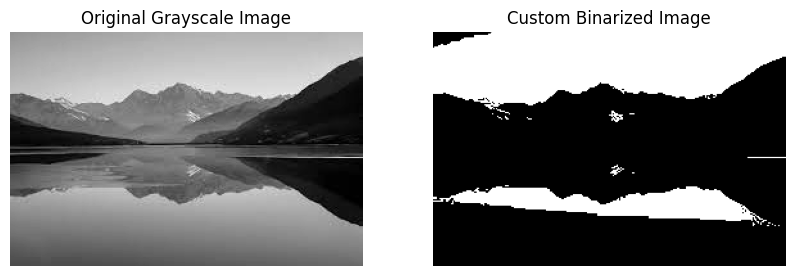

In [14]:
def custom_binarize(image_path, threshold):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = img.shape
    binary_img = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(height):
        for j in range(width):
            binary_img[i, j] = 255 if img[i, j] > threshold else 0
    
    return binary_img

custom_binary_img = custom_binarize('images.jpg', 127)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(custom_binary_img, cmap='gray')
plt.title('Custom Binarized Image')
plt.axis('off')

plt.show()

In [0]:
def process_webcam():
    
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        cv2.imshow('Grayscale Video', gray_frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

process_webcam()